# FIFA 21 IRONHACK COMPETITION

# PART (I)

**Link to repo: https://github.com/ironhack-edu/data_project_FIFA_21**


You will use the fifa21_trainning.csv dataset provided to predict the position ('OVA') of each player. The competition will take place from monday morning to tuesday. 
<br><br>
Your model will be saved in a pickle file.
<br><br>
The ranking of the competitors will be calculated according to the highest Mean Average Error (MAE), rounded to 2 decimals.
<br><br>
Ties will be broken using, respectively: R2 Score (rounded to 2 decimals), Root Mean Squared Error (rounded to 2 decimals), time to run the code (using timeit)
<br>

## DELIVERABLES:

Your group should deliver a `group Jupyter notebook` with all the preprocessing functions alongside with the model.

Everything must be delivered until 12am on Tuesday. 
<br><br>
Be prepared to share your work on Tuesday morning, the best scores will have the opportunity to show their notebook and go through their pipeline (~10 min).
<br><br>

To deliver:
* A notebook with your work and model (group_number.ipynb);
* Pickle file with the model (group_number.pkl). 
<br><br>

The instructor will use your `group Jupyter notebook` to load a new dataset and use your functions and
your model to make a prediction in unseen data.


<br><br>

For this small project you are going to work in groups to put in practice some of the concepts of the previous week.

With your group mates, open the file in `file_for_project/fifa21_training.csv`. The objective is to create the best linear model to predict the column `OVA`.

You can find some documentation about the meaning of each column in the following links:

- [link - 0](https://sofifa.com/)
- [link - 1](https://gaming.stackexchange.com/questions/167318/what-do-fifa-14-position-acronyms-mean)
- [link - 2](https://www.fifauteam.com/fifa-ultimate-team-positions-and-tactics/)

### 1

Each member of the team should have his/her own _juypter_ notebook. In addition, each group should have a `group jupyter notebook`.

### 2

Decide which columns can be predictive and which ones can be directly dropped and take the needed actions.

### 3

Decide among the members of the group who is going to take care of inspecting the remaining columns
of the dataset. For example:
Member 1: cols 1 -> 5
Member 2: cols 6 -> 10
...
and so on

### 4

Each member must do:

- Explore their assigned columns and write python code to perform any cleanup operation that the assigned columns may need.
- Perform any scaling operation that the assigned column may need.

### 5

Put all the code of each member into the `group jupyter notebook`.

Your FIFA project goes here:

## Entender datos

In [201]:
import pandas as pd
import numpy as np

In [202]:
data = pd.read_csv("./file_for_project/fifa21_training.csv")

In [203]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'Height',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA'],
      dtype='object', length=102)

In [204]:
pd.set_option ('display.max_columns', None)
data.head(2)

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77


In [205]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team_&_contract', 'height',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova'],
      dtype='object', length=102)

## Comprobar NaN

In [206]:
#Comprobando NaN
data['loan_date_end'].isna().sum()

12961

In [207]:
#Comprobando NaN
data['a/w'].isna().sum()

67

In [208]:
#Comprobando NaN
data.isna().sum()

unnamed:_0     0
id             0
name           0
age            0
nationality    0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 102, dtype: int64

## Clasificación de columnas

In [209]:
col_to_trash = ["unnamed:_0", "id", "name", "club", "loan_date_end", "position", "team_&_contract", "contract"]
col_money = ["value", "wage", "release_clause"]
col_star = ["w/f", "sm", "ir"]
col_cat = ["nationality", "bp", "foot", "a/w", 'd/w']
col_num = ['age', "height", "weight", "growth", "attacking", 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strenght', 'long_shots', 'mentality', 'agression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ova'] 
col_date = ["joined"]
col_split = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

## Transformations

### Col_money transformation & hits

In [210]:
def transform_money(c):
    c = c[1:]
    if c[-1] == 'K':
        res = float(c[:-1]) * 1000
    elif c[-1] == 'M':
        res = float(c[:-1]) * 1000000
    else:
        res = float(c)
    return res

In [211]:
for c in col_money:
    data[c] = list(map(transform_money, data[c]))

In [212]:
data['release_clause']

0          801000.0
1               0.0
2        15300000.0
3          694000.0
4         1400000.0
            ...    
13695      731000.0
13696      285000.0
13697    12000000.0
13698      245000.0
13699      946000.0
Name: release_clause, Length: 13700, dtype: float64

In [213]:
data['value']

0         525000.0
1        8500000.0
2        9000000.0
3         275000.0
4         725000.0
           ...    
13695     325000.0
13696     190000.0
13697    8000000.0
13698     140000.0
13699     425000.0
Name: value, Length: 13700, dtype: float64

In [214]:
def transform_hits(c):
    if c[-1] == 'K':
        res = float(c[:-1]) * 1000
    elif c[-1] == 'M':
        res = float(c[:-1]) * 1000000
    else:
        res = float(c)
    return res

In [215]:
data['hits'] = list(map(transform_hits, data['hits']))

### Col_star transformation

In [216]:
data['w/f'].dtype

dtype('O')

In [217]:
data['w/f'] = data['w/f'].astype(str).str[:-2]
data['sm'] = data['sm'].astype(str).str[:-1]
data['ir'] = data['ir'].astype(str).str[:-2]

In [218]:
data['w/f'].apply(str).astype(int)
data['sm'].apply(str).astype(int)
data['ir'].apply(str).astype(int)

0        1
1        2
2        2
3        1
4        1
        ..
13695    1
13696    1
13697    2
13698    1
13699    1
Name: ir, Length: 13700, dtype: int32

### col_cat transformation

#### Transform nationality

In [219]:
import pycountry_convert as pc # needed to intall pycountry_convert pip first

In [220]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    return country_continent_code

In [221]:
data['nationality'] = data['nationality'].replace(['China PR'], 'China')
data['nationality'] = data['nationality'].replace(['Wales'], 'United Kingdom')
data['nationality'] = data['nationality'].replace(['Bosnia Herzegovina'], 'Bosnia and Herzegovina')
data['nationality'] = data['nationality'].replace(['England'], 'United Kingdom')
data['nationality'] = data['nationality'].replace(['Republic of Ireland'], 'Ireland')
data['nationality'] = data['nationality'].replace(['Korea Republic'], 'South Korea')
data['nationality'] = data['nationality'].replace(['Kosovo'], 'Serbia')
data['nationality'] = data['nationality'].replace(['Scotland'], 'United Kingdom')
data['nationality'] = data['nationality'].replace(['Northern Ireland'], 'Ireland')
data['nationality'] = data['nationality'].replace(['DR Congo'], 'Congo')
data['nationality'] = data['nationality'].replace(['Curacao'], 'Venezuela')
data['nationality'] = data['nationality'].replace(['Carib'], 'Venezuela')
data['nationality'] = data['nationality'].replace(['Korea DPR'], 'North Korea')
data['nationality'] = data['nationality'].replace(['Chinese Taipei'], 'China')
data['nationality'] = data['nationality'].replace(['Taipei'], 'China')
data['nationality'] = data['nationality'].replace(['Trinidad &amp; Tobago'], 'Trinidad and Tobago')
data['nationality'] = data['nationality'].replace(['Antigua &amp; Barbuda'], 'Antigua and Barbuda')
data['nationality'] = data['nationality'].replace(['Guinea Bissau'], 'Guinea-Bisáu')
data['nationality'] = data['nationality'].replace(['Guinea-Bisáu'], 'Guinea-Bissau')
data['nationality'] = data['nationality'].replace(['São Tomé &amp; Príncipe'], 'Saint Thomas and Prince')
data['nationality'] = data['nationality'].replace(['Saint Thomas and Prince'], 'Nigeria')

In [222]:
data['nationality'] = list(map(country_to_continent, data['nationality']))

In [223]:
data['nationality'].unique()

array(['EU', 'AS', 'SA', 'NA', 'AF', 'OC'], dtype=object)

### Col_date transformation

In [224]:
data['joined'] = pd.to_datetime(data['joined'], errors='coerce')

In [225]:
data['joined']=pd.DatetimeIndex(data['joined']).year

In [226]:
data['joined']

0        2015.0
1        2015.0
2        2019.0
3        2016.0
4        2018.0
          ...  
13695    2020.0
13696    2017.0
13697    2019.0
13698    2020.0
13699    2020.0
Name: joined, Length: 13700, dtype: float64

### Col_split transformation

In [227]:
list_of_splits = [[i, i + '_2'] for i in col_split]

for pair in list_of_splits:
    data[pair] = data[pair[0]].str.split("+",expand=True,).astype(float)

#data[['ls','ls_2']] = data.ls.str.split("+",expand=True,)
#data[['st','st_2']] = data.st.str.split("+",expand=True,)
#data[['rs','rs_2']] = data.rs.str.split("+",expand=True,)
#data[['lw','lw_2']] = data.lw.str.split("+",expand=True,)
#data[['lf','lf_2']] = data.lf.str.split("+",expand=True,)
#data[['cf','cf_2']] = data.cf.str.split("+",expand=True,)
#data[['rf','rf_2']] = data.rf.str.split("+",expand=True,)
#data[['rw','rw_2']] = data.rw.str.split("+",expand=True,)
#data[['lam','lam_2']] = data.lam.str.split("+",expand=True,)
#data[['cam','cam_2']] = data.cam.str.split("+",expand=True,)
#data[['ram','ram_2']] = data.ram.str.split("+",expand=True,)
#data[['lm','lm_2']] = data.lm.str.split("+",expand=True,)
#data[['lcm','lcm_2']] = data.lcm.str.split("+",expand=True,)
#data[['cm','cm_2']] = data.cm.str.split("+",expand=True,)
#data[['rcm','rcm_2']] = data.rcm.str.split("+",expand=True,)
#data[['rm','rm_v2']] = data.rm.str.split("+",expand=True,)
#data[['lwb','lwb_2']] = data.lwb.str.split("+",expand=True,)
#data[['ldm','ldm_2']] = data.ldm.str.split("+",expand=True,)
#data[['cdm','cdm_2']] = data.cdm.str.split("+",expand=True,)
#data[['rdm','rdm_2']] = data.rdm.str.split("+",expand=True,)
#data[['rwb','rwb_2']] = data.rwb.str.split("+",expand=True,)
#data[['lb','lb_2']] = data.lb.str.split("+",expand=True,)
#data[['lcb','lcb_2']] = data.lcb.str.split("+",expand=True,)
#data[['cb','cb_2']] = data.cb.str.split("+",expand=True,)
#data[['rcb','rcb_2']] = data.rcb.str.split("+",expand=True,)
#data[['rb','rb_2']] = data.rb.str.split("+",expand=True,)
#data[['gk','gk_2']] = data.gk.str.split("+",expand=True,)

In [228]:
data.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'nationality', 'club', 'bp',
       'position', 'team_&_contract', 'height',
       ...
       'ldm_2', 'cdm_2', 'rdm_2', 'rwb_2', 'lb_2', 'lcb_2', 'cb_2', 'rcb_2',
       'rb_2', 'gk_2'],
      dtype='object', length=129)

### Transform height & weight

In [229]:
def transform_height(c):
    return float(c.split("'")[0]) * 30.48 + float(c.split("'")[1][:-1]) * 2.54

In [230]:
transform_height('5\'9\"')

175.26

In [231]:
data['height'] = list(map(transform_height, data['height']))

In [232]:
def transform_weight(c):
    return float(c.split('lbs')[0]) * 0.453592

In [233]:
data['weight'] = list(map(transform_weight, data['weight']))

### Col_drop

In [234]:
data = data.drop(["unnamed:_0", "id", "name", "club", "loan_date_end", "position", "team_&_contract", "contract", 'growth', 'joined', 'bp', 'foot', 'w/f', 'sm', 'a/w', 'd/w',], axis=1)

## Deal with NaN

In [235]:
print(list(data.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 0, 0, 44, 0, 0, 0, 0, 0, 0, 44, 0, 44, 0, 0, 44, 0, 0, 0, 0, 0, 7, 7, 44, 0, 329, 0, 0, 0, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [236]:
print(list(data.columns[data.isna().any()]))

['volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle']


In [237]:
print(list(data.select_dtypes('object')))

['nationality', 'ir']


In [238]:
col_num_with_Nan = ['joined', 'value', 'wage', 'volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'sliding_tackle']
col_num_with_Nan = ['a/w', 'd/w']

### Deal with numerical NaNs 

In [239]:
# This code replaces all the nans with their respective columns' median
data = data.fillna(data.median())

C:\Users\SR133EX\AppData\Local\Temp\ipykernel_11912\2189148093.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


### Deal with categorical NaNs

In [240]:
print(list(data.columns[data.isna().any()]))

[]


## Deal with Outliers

In [241]:
print(list(data.select_dtypes('object')))

['nationality', 'ir']


In [242]:
print(list(data._get_numeric_data()))

['age', 'height', 'weight', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova', 'ls_2', 'st_2', 'rs_2', 'lw_2', 'lf_2', 'cf_2', 'rf_2', 'rw_2', 'lam_2', 'cam_2', 'ram_2', 'lm_2', 'lcm_2', 'cm_2', '

In [243]:
categorical_col = ['nationality', 'ir']
numerical_col = ['age', 'height', 'weight', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ls_2', 'st_2', 'rs_2', 'lw_2', 'lf_2', 'cf_2', 'rf_2', 'rw_2', 'lam_2', 'cam_2', 'ram_2', 'lm_2', 'lcm_2', 'cm_2', 'rcm_2', 'rm_2', 'lwb_2', 'ldm_2', 'cdm_2', 'rdm_2', 'rwb_2', 'lb_2', 'lcb_2', 'cb_2', 'rcb_2', 'rb_2', 'gk_2', 'ova']

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

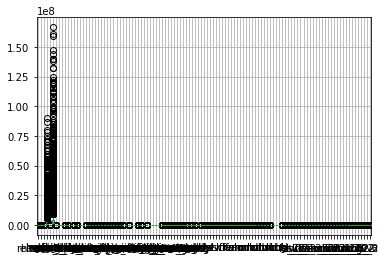

In [245]:
data.boxplot(numerical_col)

<AxesSubplot:>

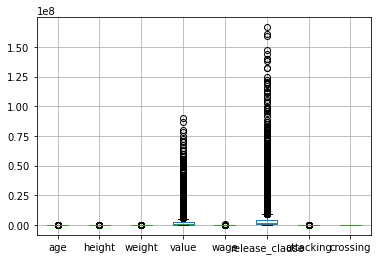

In [246]:
numerical_col_v2 = ['age', 'height', 'weight', 'value', 'wage', 'release_clause','attacking', 'crossing']
data.boxplot(numerical_col_v2)

In [247]:
for x in ['value']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [248]:
for x in ['release_clause']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

In [249]:
print(list(data.columns[data.isna().any()]))

['value', 'release_clause']


In [250]:
data.shape

(13700, 113)

In [251]:
print(list(data.isna().sum()))

[0, 0, 0, 0, 1835, 0, 1866, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [252]:
data = data.dropna(axis = 0)

In [253]:
print(list(data.isna().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Standarize

In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
for c in numerical_col[:-1]:   # we'll normalize all column except the last one (the target column)
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

## Encoding Categorical Data

In [256]:
one_hot_data=pd.get_dummies(data[categorical_col], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,nationality_AS,nationality_EU,nationality_NA,nationality_OC,nationality_SA,ir_2,ir_3,ir_4,ir_5
0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0


## Concat numerical and categorical DataFrames

In [257]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=categorical_col, inplace=True)
data.head()

,age,height,weight,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,ls_2,st_2,rs_2,lw_2,lf_2,cf_2,rf_2,rw_2,lam_2,cam_2,ram_2,lm_2,lcm_2,cm_2,rcm_2,rm_2,lwb_2,ldm_2,cdm_2,rdm_2,rwb_2,lb_2,lcb_2,cb_2,rcb_2,rb_2,gk_2,nationality_AS,nationality_EU,nationality_NA,nationality_OC,nationality_SA,ir_2,ir_3,ir_4,ir_5
0,0.178228,-0.868062,-0.282955,-0.474575,-0.196013,-0.468961,0.115811,0.248179,0.038312,-0.561822,0.854232,0.044159,0.394915,0.293729,-0.205364,0.728581,0.744070,0.280058,0.538222,-0.030593,0.588062,-0.174695,0.641227,1.284548,0.216302,0.314842,0.722269,0.605559,-0.751232,-0.116169,0.602219,-0.090568,0.324048,0.623612,1.122564,0.322689,-0.359687,0.183130,0.170934,0.439643,-0.087330,-0.373578,-0.520524,-0.222248,-0.098611,-0.406704,-0.580543,0.383749,0.121574,0.165547,-0.173719,0.630803,0.056780,0.136263,-0.401508,-0.162636,0.255949,0.255949,0.255949,0.391366,0.491253,0.491253,0.491253,0.391366,0.554499,0.554499,0.554499,0.515443,0.673142,0.673142,0.673142,0.515443,0.425467,0.453400,0.453400,0.453400,0.425467,0.393915,0.151686,0.151686,0.151686,0.393915,-0.387849,64,-1.284429,-1.284429,-1.284429,0.091373,0.060882,0.060882,0.060882,0.091373,-1.161948,-1.161948,-1.161948,-1.245833,-1.567690,-1.567690,-1.567690,-1.245833,-1.697533,-1.440897,-1.440897,-1.440897,-1.697533,-1.938320,-1.061606,-1.061606,-1.061606,-1.938320,-2.167185,0,1,0,0,0,0,0,0,0
3,-0.605197,-0.499616,-0.854998,-0.711205,-0.196013,-0.524952,-0.115757,-0.334341,-0.227815,0.343072,0.255292,-0.428214,0.026046,-0.107837,-0.379144,0.191880,0.324454,0.149154,-0.644765,-0.710006,-0.377643,-0.314451,-0.744062,-0.647978,-0.389635,-0.070001,-0.377904,0.144419,-0.516001,-0.497432,0.053699,0.328119,0.571609,-1.061152,0.038895,0.322689,-0.915394,0.517645,0.476699,0.535312,0.497525,-0.448351,-0.460451,-0.410137,-0.602079,-0.530218,-0.226091,-0.251860,-0.666421,-0.926752,-0.702710,-0.331469,-0.608193,0.505273,-0.401508,-0.110042,-0.385030,-0.385030,-0.385030,-0.352723,-0.352380,-0.352380,-0.352380,-0.352723,-0.222095,-0.222095,-0.222095,-0.260950,0.091145,0.091145,0.091145,-0.260950,0.189872,0.376067,0.376067,0.376067,0.189872,0.317314,0.435001,0.435001,0.435001,0.317314,-0.457249,59,0.380471,0.380471,0.380471,0.091373,0.060882,0.060882,0.060882,0.091373,0.367599,0.367599,0.367599,0.380764,0.333053,0.333053,0.333053,0.380764,0.308408,0.321473,0.321473,0.321473,0.308408,0.280374,0.377676,0.377676,0.377676,0.280374,0.299948,0,1,0,0,0,0,0,0,0
4,-0.409341,-0.131169,-0.982119,-0.285270,-0.443673,-0.155516,-0.014446,-0.043081,-0.493943,0.524051,0.704497,-0.546307,0.312944,0.465829,-0.205364,0.132247,0.604198,0.476414,0.131570,0.105289,0.105209,-0.174695,0.137486,0.354072,-0.326952,0.237873,-2.578249,1.264331,-0.280770,-0.225101,0.668706,0.627180,0.720145,0.243182,0.812944,-0.003714,0.010785,0.801983,0.629582,0.678816,1.033642,-0.323729,-0.460451,-0.410137,-0.035677,-0.653732,-0.048866,0.309937,0.206002,-0.107527,-0.702710,0.310045,0.167609,0.689778,0.227852,-0.149487,0.095704,0.095704,0.095704,0.242548,0.261171,0.261171,0.261171,0.242548,0.399180,0.399180,0.399180,0.437804,0.673142,0.673142,0.673142,0.437804,0.818126,0.840066,0.840066,0.840066,0.818126,0.776918,0.647487,0.647487,0.647487,0.776918,-0.387849,65,0.380471,0.380471,0.380471,0.091373,0.060882,0.060882,0.060882,0.091373,0.367599,0.367599,0.367599,0.380764,0.333053,0.333053,0.333053,0.380764,0.308408,0.321473,0.321473,0.321473,0.308408,0.280374,0.377676,0.377676,0.37767

## Splitting into train set and test set

In [258]:
# first, split X-y (learning-target data)
X=data.drop(columns=['ova'])
y=data['ova']

# checking shape
print(X.shape)
print(y.shape)

(11688, 119)
(11688,)


In [259]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

In [260]:
# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

## Modeling

### Linear Regression

In [261]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

### Regulation

In [262]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2

In [263]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [264]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [265]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

### Random Forest Regressor

In [266]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

### XGBoost

In [267]:
# conda install -c conda-forge xgboost

from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

### LightGBM

In [268]:
# conda install -c conda-forge lightgbm
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

## Model Validation

In [269]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

### R2

In [270]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.8937619117652096 -- test R2: 0.8902460434481826
Model: lasso, train R2: 0.7878371813557015 -- test R2: 0.7838451894757684
Model: ridge, train R2: 0.8937988794576077 -- test R2: 0.8908544088625439
Model: elastic, train R2: 0.8048625586578926 -- test R2: 0.7991906557427119
Model: rfr, train R2: 0.9973725098419126 -- test R2: 0.9862114065235774
Model: xgbr, train R2: 0.9979272238084281 -- test R2: 0.9859690940189648
Model: lgbmr, train R2: 0.9940329415425969 -- test R2: 0.9887678763948325


### MSE

In [271]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 3.433574336921566 -- test MSE: 3.725396856979178
Model: lasso, train MSE: 6.8570210689036974 -- test MSE: 7.336978793723205
Model: ridge, train MSE: 3.4323795552568854 -- test MSE: 3.7047470082287477
Model: elastic, train MSE: 6.306767392914949 -- test MSE: 6.816105072211754
Model: rfr, train MSE: 0.08491947593582883 -- test MSE: 0.4680285286569718
Model: xgbr, train MSE: 0.06699133291851447 -- test MSE: 0.4762533824249012
Model: lgbmr, train MSE: 0.1928530447664854 -- test MSE: 0.381253845333009


### RMSE

In [272]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 1.8529906467442208 -- test RMSE: 1.930128715132537
Model: lasso, train RMSE: 2.6185914284026244 -- test RMSE: 2.7086858056487846
Model: ridge, train RMSE: 1.852668225899307 -- test RMSE: 1.9247719366794467
Model: elastic, train RMSE: 2.5113278147057883 -- test RMSE: 2.6107671424720653
Model: rfr, train RMSE: 0.29140946438959187 -- test RMSE: 0.6841261058145434
Model: xgbr, train RMSE: 0.2588268396409354 -- test RMSE: 0.6901111377342791
Model: lgbmr, train RMSE: 0.4391503669205861 -- test RMSE: 0.6174575656132242


### MAE

In [273]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 1.4182884595081748 -- test MAE: 1.4855504585606214
Model: lasso, train MAE: 1.9682398371469396 -- test MAE: 2.049913873219107
Model: ridge, train MAE: 1.4169561463015694 -- test MAE: 1.4817453413384658
Model: elastic, train MAE: 1.8764172674780328 -- test MAE: 1.9580791602417404
Model: rfr, train MAE: 0.16004598930481292 -- test MAE: 0.42640290846877676
Model: xgbr, train MAE: 0.1963445718530665 -- test MAE: 0.48275814431666103
Model: lgbmr, train MAE: 0.3186045749273949 -- test MAE: 0.4256755007698967


In [274]:
col_names = categorical_col + numerical_col

In [275]:
len(col_names)

113

In [276]:
from math import comb

In [277]:
comb(len(col_names), 2)

6328

In [278]:
from itertools import combinations

In [279]:
list(combinations(col_names, 2))

[('nationality', 'ir'),
 ('nationality', 'age'),
 ('nationality', 'height'),
 ('nationality', 'weight'),
 ('nationality', 'value'),
 ('nationality', 'wage'),
 ('nationality', 'release_clause'),
 ('nationality', 'attacking'),
 ('nationality', 'crossing'),
 ('nationality', 'finishing'),
 ('nationality', 'heading_accuracy'),
 ('nationality', 'short_passing'),
 ('nationality', 'volleys'),
 ('nationality', 'skill'),
 ('nationality', 'dribbling'),
 ('nationality', 'curve'),
 ('nationality', 'fk_accuracy'),
 ('nationality', 'long_passing'),
 ('nationality', 'ball_control'),
 ('nationality', 'movement'),
 ('nationality', 'acceleration'),
 ('nationality', 'sprint_speed'),
 ('nationality', 'agility'),
 ('nationality', 'reactions'),
 ('nationality', 'balance'),
 ('nationality', 'power'),
 ('nationality', 'shot_power'),
 ('nationality', 'jumping'),
 ('nationality', 'stamina'),
 ('nationality', 'strength'),
 ('nationality', 'long_shots'),
 ('nationality', 'mentality'),
 ('nationality', 'aggression'